# Chapter 2: Atmospheric CO<sub>2</sub>
- We will model Atmospheric CO<sub>2</sub> at the Earth System Research Laboratory in Mauna Loa, Hawaii.
- The dataset contains daily values for Atmospheric CO<sub>2</sub>.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

## Data Preparation
- We will load the data into a dataframe to fit a Prophet model.

In [61]:
df = pd.read_csv('data/co2-ppm-daily.csv')
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

## Dataset Analysis
- Clearly, the minimum and maximum are not enough to describe or predict the data.
- There is a clear increasing trend from the graph with a strong seasonal component.

,ds,y
count,18764,18764.000000
mean,1989-06-19 08:38:51.443189120,354.855353
min,1958-03-30 00:00:00,312.330000
25%,1975-08-22 18:00:00,331.730000
50%,1990-01-25 12:00:00,353.525000
75%,2003-06-30 06:00:00,375.382500
max,2017-12-31 00:00:00,412.660000
std,NaN,26.207265


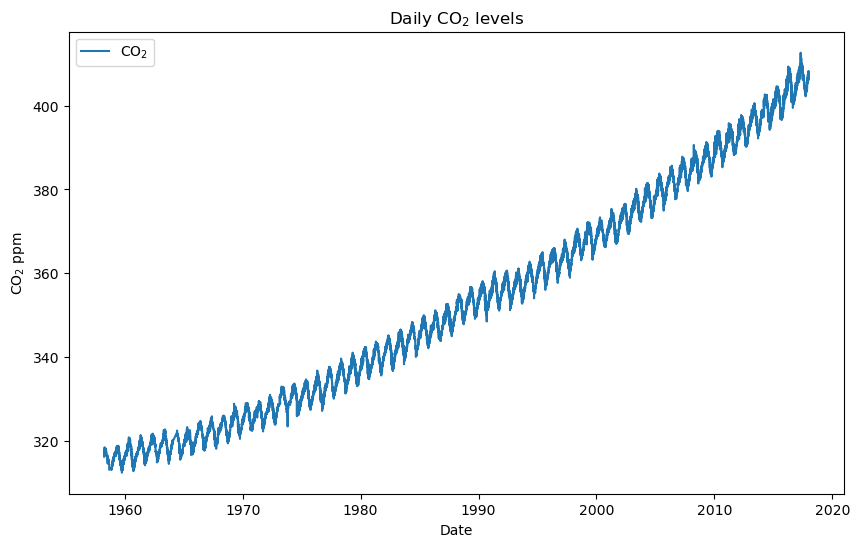

In [62]:
display(df.describe())

fig = plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['y'])
plt.title('Daily CO$_2$ levels')
plt.legend(['CO$_2$'])
plt.ylabel('CO$_2$ ppm')
plt.xlabel('Date')
plt.show()

# Seasonal Component Analysis
- In the following graph, we will focus in the year 1990, there is a clear seasonal component to the series.
- The CO<sub>2</sub> levels increase during winter from approximate October to May and decrease during summer.

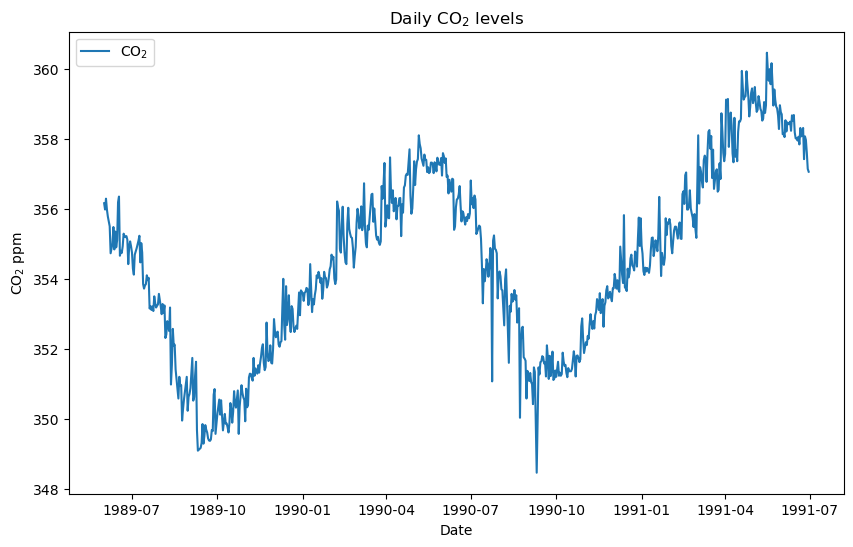

In [63]:
df_1990 = df[(df['ds'] >= '1989-06-01') & (df['ds'] <= '1991-06-30')]
fig = plt.figure(figsize=(10, 6))
plt.plot(df_1990['ds'], df_1990['y'])
plt.title('Daily CO$_2$ levels')
plt.legend(['CO$_2$'])
plt.ylabel('CO$_2$ ppm')
plt.xlabel('Date')
plt.show()

# Training a Prophet Model
- We will fit a prophet model and then make a 10-year forecast.
- We can display the last 3 days of the model in year 2027.

In [64]:
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=365 * 10)
forecast = model.predict(future)
forecast.tail(3).T

23:51:44 - cmdstanpy - INFO - Chain [1] start processing
23:51:48 - cmdstanpy - INFO - Chain [1] done processing


,22411,22412,22413
ds,2027-12-27 00:00:00,2027-12-28 00:00:00,2027-12-29 00:00:00
trend,429.110996,429.11711,429.123223
yhat_lower,417.252361,417.276205,417.122908
yhat_upper,440.357094,440.751488,440.925206
trend_lower,417.598843,417.601465,417.604088
trend_upper,441.161215,441.172985,441.184756
additive_terms,-0.466702,-0.416817,-0.388455
additive_terms_lower,-0.466702,-0.416817,-0.388455
additive_terms_upper,-0.466702,-0.416817,-0.388455
weekly,-0.011891,0.005464,0.002039


# Plotting the 10-year forecast
- We see as the forecast progresses the uncertainty also increases.

/opt/anaconda3/envs/prophet/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/prophet/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


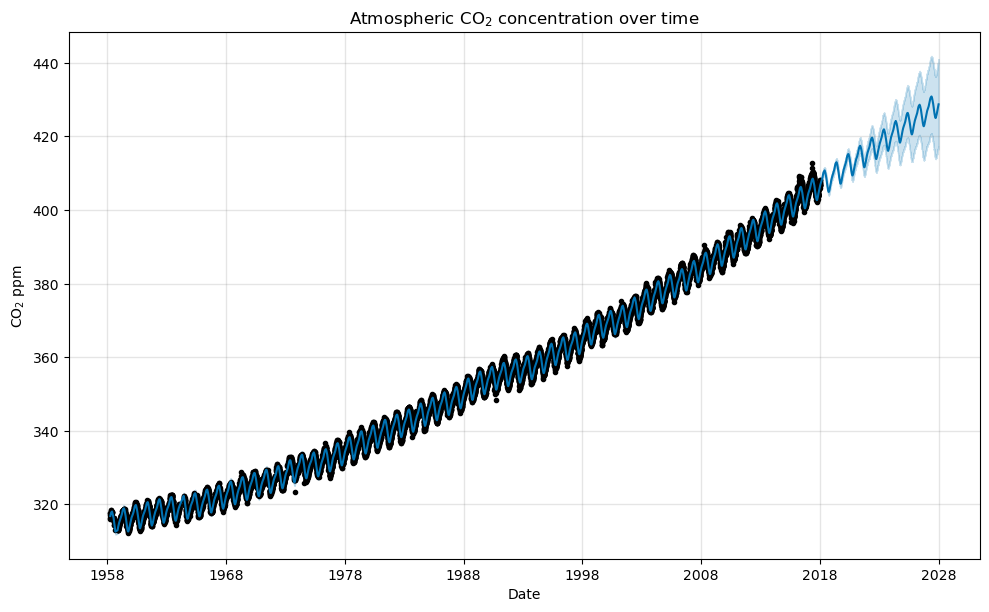

In [65]:
fig = model.plot(forecast, xlabel='Date', ylabel='CO$_2$ ppm')
plt.title('Atmospheric CO$_2$ concentration over time')
plt.show()

# Uncertainty in Prediction
- We can plot the uncertainty in the prediction, by inspecting the data columns in the forecast produced by the Prophet model.
- We can see that the uncertainty increases exponentially as we predict beyond the maximum dataset year, 2017.

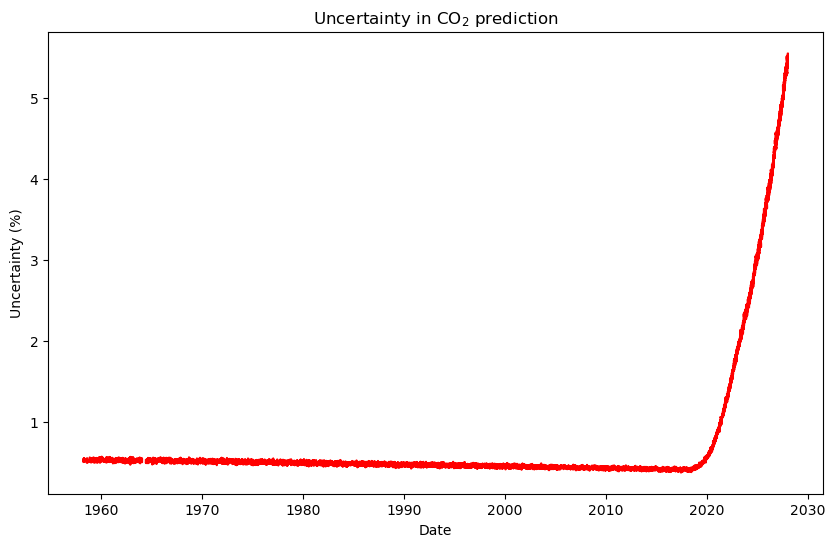

In [66]:
diff = (forecast['yhat_upper'] - forecast['yhat_lower']) / forecast['yhat'] * 100
fig = plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], diff, color='red', linestyle='dashed')
plt.title('Uncertainty in CO$_2$ prediction')
plt.ylabel('Uncertainty (%)')
plt.xlabel('Date')
plt.show()

# Model Components
- We can plot and decompose the model components into the trend, that is increasing, and yearly and weekly seasonal patterns.

/opt/anaconda3/envs/prophet/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/prophet/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/anaconda3/envs/prophet/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an nda

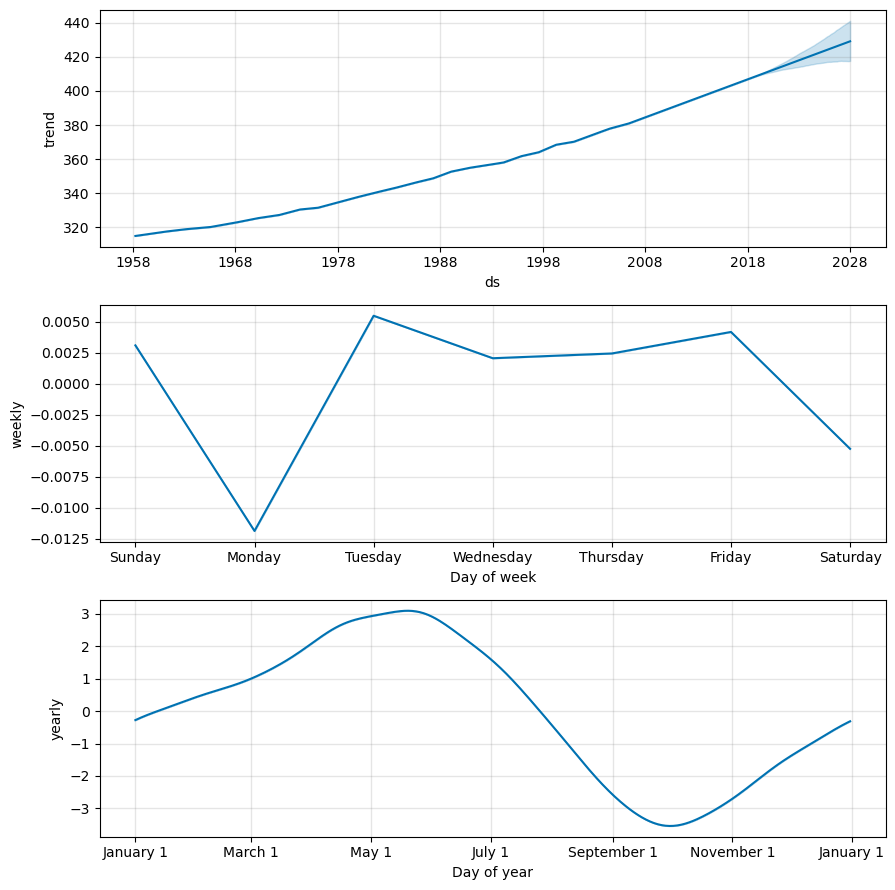

In [67]:
fig2 = model.plot_components(forecast)
plt.show()